# TASK
#### 1. Use wordcloud analysis tool to visualize 
#### 2. Use Python crawler to crawl the data of web pages
#### 3. Use XPath tool to analyze and extract the desired elements

## [1] Install packages

In [1]:
! pip install wordcloud

In [2]:
!pip install jieba #This package is for analyzing Chinese

ERROR: Invalid requirement: '#This'


In [3]:
# -*- coding:utf-8 -*-
# Platform: NetEase Cloud Music
# Process: Search ID of singer --> get the wordcloud of him/her/them
import requests
import sys
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import numpy as np
from lxml import etree

## [2] Lyric extraction from a Chinese song

In [4]:
# Set headers for using requests.request - HTML
headers = {
       'Referer'  :'http://music.163.com',
       'Host'     :'music.163.com',
       'Accept'   :'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
       'User-Agent':'Chrome/10'
    }
 
# Define a function to connect API
# To get lyrics of a certain song
def get_song_lyric(headers,lyric_url):
    res = requests.request('GET', lyric_url, headers=headers)
    if 'lrc' in res.json():
       lyric = res.json()['lrc']['lyric']
       new_lyric = re.sub(r'[\d:.[\]]','',lyric)
       return new_lyric
    else:
       return ''
       print(res.json())


## [3] Remove stop words

In [5]:
def remove_stop_words(f):
    stop_words = ['作词', '作曲', '编曲', 'Arranger', '录音', '混音', '人声', 'Vocal', '弦乐', 'Keyboard', '键盘', '编辑', '助理', 'Assistants', 'Mixing', 'Editing', 'Recording', '音乐', '制作', 'Producer', '发行', 'produced', 'and', 'distributed']
    for stop_word in stop_words:
       f = f.replace(stop_word, '')
    return f


## [4] Generate wordcloud 

In [6]:
def create_word_cloud(f):
    print('According to Frequency of words，start generating wordcloud!')
    f = remove_stop_words(f)
    cut_text = " ".join(jieba.cut(f,cut_all=False, HMM=True))
    wc = WordCloud(
       font_path="D:/Jupyter工作空间/data visualization - 歌词显示/wc.ttf",
       max_words=100,
       width=3000,
       height=3000,
    )
    print(cut_text)
    wordcloud = wc.generate(cut_text)
    # Generate jpg file
    wordcloud.to_file("wordcloud.jpg")
    # show the wordcloud file
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


## [5] Get IDs and names of top 50 popular songs of a Chinese singer - Mao Buyi

In [7]:
def get_songs(artist_id):
    page_url = 'https://music.163.com/artist?id=' + artist_id
    # Get HTML
    res = requests.request('GET', page_url, headers=headers)
    # Use XPath to parse top 50 most popular songs
    html = etree.HTML(res.text)
    href_xpath = "//*[@id='hotsong-list']//a/@href"
    name_xpath = "//*[@id='hotsong-list']//a/text()"
    hrefs = html.xpath(href_xpath)
    names = html.xpath(name_xpath)
    # Set ID and names of popular songs
    song_ids = []
    song_names = []
    for href, name in zip(hrefs, names):
       song_ids.append(href[9:])
       song_names.append(name)
       print(href, '  ', name)
    return song_ids, song_names

# Set singer ID - Mao Buyi = 12138269
artist_id = '12138269'
[song_ids, song_names] = get_songs(artist_id)


/song?id=1417862046    呓语
/song?id=569213220    像我这样的人
/song?id=569200213    消愁
/song?id=569214250    借
/song?id=569200210    给你给我
/song?id=569214247    平凡的一天
/song?id=1953125353    看得最远的地方
/song?id=569200212    一荤一素
/song?id=536099160    不染
/song?id=1903149553    无名的人
/song?id=569212211    盛夏
/song?id=525278524    无问
/song?id=1411558182    东北民谣
/song?id=1860567964    生活在别处的你 Another me
/song?id=1940770243    遥远的她 (Live)
/song?id=1951513623    分分钟需要你 (Live)
/song?id=569212210    想你想你
/song?id=569214252    如果有一天我变得很有钱
/song?id=1407214788    二零三
/song?id=1417849873    一程山路
/song?id=1449782341    入海
/song?id=1947537071    最佳损友 (Live)
/song?id=1417856017    小王
/song?id=1334270281    别再闹了
/song?id=1953436735    下一站天后 (Live)
/song?id=1969842586    聊聊
/song?id=1422141746    忽然之间 (Live)
/song?id=569200211    哎哟
/song?id=1408763442    水乡
/song?id=1383923446    17
/song?id=1413304559    胡同
/song?id=569214249    南一道街
/song?id=1417862026    深夜一角
/song?id=1960868406    可惜我是水瓶座 (Live)
/song?id=19453

## [6] Get all words in lyrics

In [8]:
# all lyrics
all_word = ''
# Get lyrics in every single song
for (song_id, song_name) in zip(song_ids, song_names):
    # lyric API URL
    lyric_url = 'http://music.163.com/api/song/lyric?os=pc&id=' + song_id + '&lv=-1&kv=-1&tv=-1'
    lyric = get_song_lyric(headers, lyric_url)
    all_word = all_word + ' ' + lyric
    print(song_name)



呓语
像我这样的人
消愁
借
给你给我
平凡的一天
看得最远的地方
一荤一素
不染
无名的人
盛夏
无问
东北民谣
生活在别处的你 Another me
遥远的她 (Live)
分分钟需要你 (Live)
想你想你
如果有一天我变得很有钱
二零三
一程山路
入海
最佳损友 (Live)
小王
别再闹了
下一站天后 (Live)
聊聊
忽然之间 (Live)
哎哟
水乡
17
胡同
南一道街
深夜一角
可惜我是水瓶座 (Live)
星语心愿 (Live)
孤独患者 (Live)
若有缘由
弥敦道 (Live)
小空
小王日记
芬芳一生
东方之珠 (Live)
等
旅行家说
感觉自己是巨星
借 (Live)
城市傍晚
不再犹豫 (Live)
于是没有洗头
言不由衷 (Live)


## [7] Generate word cloud
According to word frequency.

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CHRIST~1\AppData\Local\Temp\jieba.cache


According to Frequency of words，start generating wordcloud!


Loading model cost 0.564 seconds.
Prefix dict has been built successfully.


        毛 不易 
       毛 不易 
       福禄寿 FloruitShow / 韦伟 
   人     韦伟 
   吉他     刘磊 Liu   Lei 
   贝斯     韩阳 Han   Yang 
   鼓     德恒 De   Heng 
       韦伟 Oldbanana 
   配唱 人     何文锐 He   WenRui @ 光合 声动 
   和 声     何文锐 He   WenRui @ 光合 声动 
       李越 Li   Yue @ 摩登 天空 ModernSky 
       祝薇 Avi   Zhu 
       李越 Li   Yue @ 野火 春风 EFO   Sound 
   母带     Ry   Merrill @ Sterling   Sound   NY 
       哇 唧唧 哇   Wajijiwa   Entertainment   ( Tianjin )   Co / Ltd 
   出品     哇 唧唧 哇   Wajijiwa   Entertainment   ( Tianjin )   Co / Ltd 
   母带 版权 公司     哇 唧唧 哇   Wajijiwa   Entertainment   ( Tianjin )   Co / Ltd 
 
 一段 未醒 
 又 做 一段 
 如果 这 画面 有 开关 
 从 期待 走 到 不堪 
 结局 不 好看 
 人 总 需要 记住 遗憾 
 它 来 过   它 走 了 
 没 回头   没问 过 
 你 可 舍得 
 
 日月蹉跎 
 小起 大落 
 光阴 里 有 多少 景色 
 偶尔 也 心口 一热 
 什么 都 不 说 
 好过 亲手 把 它 撕破 
 路 还 长   梦 还 多 
 被 这话   欺骗 的 
 何止 你 我 
 
 可是 我 现在 依然 不太会 转弯 
 虽然 孤单 的 人 偶尔 也 想 有 个 伴 
 冷风 又 吹 的 时候 想 说 
 这 生活 会 不会 有点 难 
 难道 是因为 当初 有话 没 讲完 
 堵 在 喉咙 里 却 始终 不敢 大声 喊 
 算了   别哭 
 
 日月蹉跎 
 小起 大落 
 光阴 里 有 多少 景色 
 偶尔 也 心口 一热 
 什

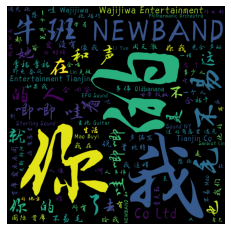

In [9]:
create_word_cloud(all_word)